In [30]:
import numpy as np
import sys
sys.path.append('..')
from utils.DataEngine import LogInterpreter
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('/home/felix/Dev/Prosperity/data2024/round-2-island-data-bottle/prices_round_2_day_-1.csv', sep=";")
df

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.000000,-1
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,-1
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,-1
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,-1
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,-1
...,...,...,...,...,...,...,...,...
9996,999600,1227.75,1.4,8.5,-3.0,3901.9530,83.025764,-1
9997,999700,1226.75,1.4,8.5,-3.0,3901.4612,83.019300,-1
9998,999800,1227.75,1.4,8.5,-3.0,3900.9720,83.012856,-1
9999,999900,1228.00,1.4,8.5,-3.0,3900.4849,83.006424,-1


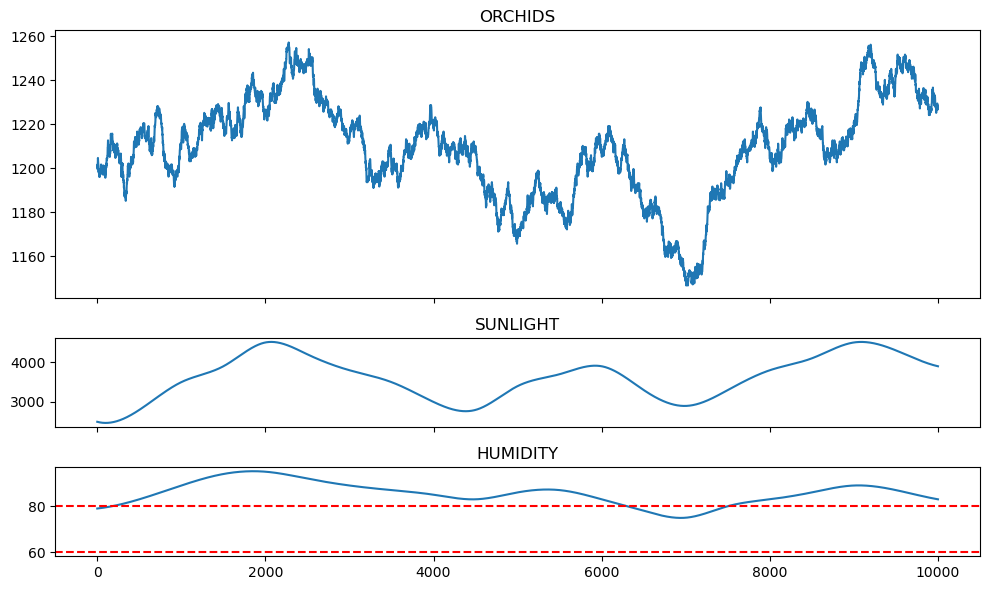

In [54]:
def plot_orchids_sunlight_humidity(df):
    # make first ax larger
    fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 1, 1]})
    axs[0].plot(df['ORCHIDS'])
    axs[0].set_title('ORCHIDS')
    axs[1].plot(df['SUNLIGHT'])
    axs[1].set_title('SUNLIGHT')
    axs[2].plot(df['HUMIDITY'])
    axs[2].set_title('HUMIDITY')
    # create dashed line between 60 to 80
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')
    plt.tight_layout()

plot_orchids_sunlight_humidity(df)

### Notes Round 2

ORCHIDS:

- Influenced

- Sun lt 7h/day => decrease production by 4% per 10 minutes (if i )

- Humidity for orchids to grow between 60 to 80, if outside production will fall 2% per 5 humi
dity points

- shipping costs

- storage space 5000 0.1 seashell per orchid per ts, reverse also true (make 0.1 if short)



In [52]:
60*60*24/1_000_000*100

8.64

In [58]:
7/24*1_000_000 * 100

29166666.666666668

In [57]:
60*24*60

86400